<a href="https://colab.research.google.com/github/arianesannt/notebooks/blob/main/atividadeFIAP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Problema de negócio


Qual o montante de venda de exportação nos ultimos 15 anos? Separe a análise por país e traga as prospecções futuras e possíveis ações de melhoria nas exportações.

O Head solicitou a construção de uma tabela contendo:


*   País de origem
*   País destino
*   Quantidade em litros de vinho exportado (1kg = 1L)
*   Valor em U$$  




Fatores externos que podem influenciar as análises:

1.   Dados climáticos
2.   Dados demográficos
3.   Dados econômicos
4.   Dados de avaliação de vinhos












## Importando bibliotecas

In [1]:

# importando as bibliotecas

import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.options.display.float_format = '{:,.2f}'.format
from datetime import date

# Organização, tratamento e exploração - dataset ExpVinho.csv - produto: vinho de mesa

## Importando os dados

In [2]:
exportacao = pd.read_csv('https://github.com/arianesannt/dados/raw/main/ExpVinho.csv', sep=';')


## Organizando os dados (formatação, limpeza, etc.)

In [3]:
# vou excluir a coluna 'Id', porque não vejo utilidade de mantê-la, pois não traz informação relevante, é apenas um identificador que aqui não tem importância

exportacao = exportacao.drop('Id', axis=1)
exportacao.head()

,País,1970,1970.1,1971,1971.1,1972,1972.1,1973,1973.1,1974,...,2018,2018.1,2019,2019.1,2020,2020.1,2021,2021.1,2022,2022.1
0,Afeganistão,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,11,46,0,0
1,África do Sul,0,0,0,0,0,0,0,0,0,...,0,0,26,95,4,21,0,0,0,0
2,"Alemanha, República Democrática",0,0,0,0,4168,2630,12000,8250,0,...,10794,45382,3660,25467,6261,32605,2698,6741,7630,45367
3,Angola,0,0,0,0,0,0,0,0,0,...,477,709,345,1065,0,0,0,0,4068,4761
4,Anguilla,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
# o problema de negócio pede que sejam analisados os últimos 15 anos
# vou deixar somente as colunas de anos que interessam
# como cada coluna representa um valor de quantidade e de valor monetario por ano, eu vou conservar somente as últimas 30 colunas

colunas = exportacao.columns[-30:]
colunas = colunas.insert(0, 'País')
colunas

Index(['País', '2008', '2008.1', '2009', '2009.1', '2010', '2010.1', '2011',
       '2011.1', '2012', '2012.1', '2013', '2013.1', '2014', '2014.1', '2015',
       '2015.1', '2016', '2016.1', '2017', '2017.1', '2018', '2018.1', '2019',
       '2019.1', '2020', '2020.1', '2021', '2021.1', '2022', '2022.1'],
      dtype='object')

In [5]:
exportacao = exportacao[colunas]
exportacao.head()

,País,2008,2008.1,2009,2009.1,2010,2010.1,2011,2011.1,2012,...,2018,2018.1,2019,2019.1,2020,2020.1,2021,2021.1,2022,2022.1
0,Afeganistão,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,11,46,0,0
1,África do Sul,0,0,0,0,0,0,0,0,0,...,0,0,26,95,4,21,0,0,0,0
2,"Alemanha, República Democrática",265742,429970,225086,393482,27715,138666,36070,144150,8189,...,10794,45382,3660,25467,6261,32605,2698,6741,7630,45367
3,Angola,25721,71083,54786,84235,33557,189891,13889,69001,2833,...,477,709,345,1065,0,0,0,0,4068,4761
4,Anguilla,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
exportacao = exportacao.set_index('País')


In [7]:
paises_comex_zero = exportacao.T.sum()
paises_comex_zero = paises_comex_zero.loc[paises_comex_zero == 0]
paises_comex_zero = paises_comex_zero.index
exportacaoT = exportacao.T.drop(paises_comex_zero, axis=1)
exportacao = exportacaoT.T


In [8]:
display(exportacao.head(3))
display(exportacao.index)
display(exportacao.columns)

,2008,2008.1,2009,2009.1,2010,2010.1,2011,2011.1,2012,2012.1,...,2018,2018.1,2019,2019.1,2020,2020.1,2021,2021.1,2022,2022.1
País,,,,,,,,,,,,,,,,,,,,,
Afeganistão,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,11,46,0,0
África do Sul,0,0,0,0,0,0,0,0,0,0,...,0,0,26,95,4,21,0,0,0,0
"Alemanha, República Democrática",265742,429970,225086,393482,27715,138666,36070,144150,8189,56342,...,10794,45382,3660,25467,6261,32605,2698,6741,7630,45367


Index(['Afeganistão', 'África do Sul', 'Alemanha, República Democrática',
       'Angola', 'Antígua e Barbuda', 'Antilhas Holandesas', 'Argentina',
       'Aruba', 'Austrália', 'Áustria',
       ...
       'Taiwan (FORMOSA)', 'Tcheca, República', 'Togo', 'Trinidade Tobago',
       'Turquia', 'Tuvalu', 'Uruguai', 'Vanuatu', 'Venezuela', 'Vietnã'],
      dtype='object', name='País', length=117)

Index(['2008', '2008.1', '2009', '2009.1', '2010', '2010.1', '2011', '2011.1',
       '2012', '2012.1', '2013', '2013.1', '2014', '2014.1', '2015', '2015.1',
       '2016', '2016.1', '2017', '2017.1', '2018', '2018.1', '2019', '2019.1',
       '2020', '2020.1', '2021', '2021.1', '2022', '2022.1'],
      dtype='object')

## Criando um dataframe para séries temporais

In [9]:
# vou separar os valores das variáveis 'quantidade' e 'valor' que hoje estão representadas no dataframe como ANO e ANO.1 respectivamente
quantidadekg = []
valoruss = []

for item in exportacao.columns:
  if item == 'País':
    quantidadekg.append(item)
    valoruss.append(item)
  elif len(item) == 4:
    quantidadekg.append(item)
  else:
    valoruss.append(item)

In [10]:
# criando dataframe só com dados da quantidade

quantidade_kg2 = exportacao[quantidadekg]
quantidade_kg = exportacao[quantidadekg]
quantidade_kg = quantidade_kg.T
quantidade_kg.head()

País,Afeganistão,África do Sul,"Alemanha, República Democrática",Angola,Antígua e Barbuda,Antilhas Holandesas,Argentina,Aruba,Austrália,Áustria,...,Taiwan (FORMOSA),"Tcheca, República",Togo,Trinidade Tobago,Turquia,Tuvalu,Uruguai,Vanuatu,Venezuela,Vietnã
2008,0,0,265742,25721,0,17938,0,0,218726,0,...,10030,17135,5160,0,0,0,0,0,0,0
2009,0,0,225086,54786,0,8235,162,0,1014,0,...,0,9269,0,0,0,0,0,0,0,743
2010,0,0,27715,33557,0,9810,0,0,1823,0,...,0,1091,0,0,0,0,914,0,0,8820
2011,0,0,36070,13889,0,7335,13253,900,3632,0,...,4500,6846,0,0,0,0,1238,0,0,0
2012,0,0,8189,2833,0,9247,0,0,9345,0,...,0,7960,0,531,0,0,1135,0,1029,0


In [11]:
# retirando os países que não compraram vinho do brasil

paises_comex_zero = quantidade_kg.sum()
paises_comex_zero = paises_comex_zero.loc[paises_comex_zero == 0]
paises_comex_zero = paises_comex_zero.index
quantidade_kg_s = quantidade_kg.drop(paises_comex_zero, axis=1)
display(quantidade_kg_s.index)
display(quantidade_kg_s.columns)


Index(['2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016',
       '2017', '2018', '2019', '2020', '2021', '2022'],
      dtype='object')

Index(['Afeganistão', 'África do Sul', 'Alemanha, República Democrática',
       'Angola', 'Antígua e Barbuda', 'Antilhas Holandesas', 'Argentina',
       'Aruba', 'Austrália', 'Áustria',
       ...
       'Taiwan (FORMOSA)', 'Tcheca, República', 'Togo', 'Trinidade Tobago',
       'Turquia', 'Tuvalu', 'Uruguai', 'Vanuatu', 'Venezuela', 'Vietnã'],
      dtype='object', name='País', length=117)

In [33]:
somatorio_quantidade_kg_s = quantidade_kg_s.sum()

In [37]:
somatorio_quantidade_kg_s = somatorio_quantidade_kg_s.sort_values(ascending=False)

<Axes: xlabel='País'>

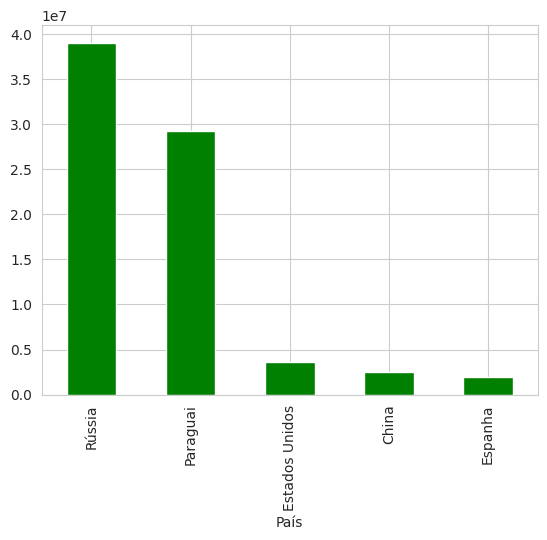

In [40]:
somatorio_quantidade_kg_s.head().plot(kind='bar', color='green')

In [12]:
# criando dataframe só com dados de valores em U$$

valor_uss = exportacao[valoruss]
valor_uss2 = exportacao[valoruss]
valor_uss.head()

,2008.1,2009.1,2010.1,2011.1,2012.1,2013.1,2014.1,2015.1,2016.1,2017.1,2018.1,2019.1,2020.1,2021.1,2022.1
País,,,,,,,,,,,,,,,
Afeganistão,0,0,0,0,0,0,0,0,0,0,0,0,0,46,0
África do Sul,0,0,0,0,0,0,0,0,0,0,0,95,21,0,0
"Alemanha, República Democrática",429970,393482,138666,144150,56342,265978,761653,44780,68109,87702,45382,25467,32605,6741,45367
Angola,71083,84235,189891,69001,8861,9300,23124,17089,35390,61680,709,1065,0,0,4761
Antígua e Barbuda,0,0,0,0,0,0,0,0,0,0,191,1549,1864,2268,1866


In [13]:
# retirando o '.1' do valor da coluna para que futuramente eu consiga juntar as tabelas
# passo 1: organizar os nomes das colunas em uma lista retirando as 2 últimas strings

colunas = valor_uss.columns.str[:-2]
colunas

Index(['2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016',
       '2017', '2018', '2019', '2020', '2021', '2022'],
      dtype='object')

In [14]:
# passo 2: atualizar o nome das colunas do dataframe com a lista de nomes atualizadas ('colunas')

valor_uss2.columns = colunas
valor_uss.columns = colunas
valor_uss.head()

,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
País,,,,,,,,,,,,,,,
Afeganistão,0,0,0,0,0,0,0,0,0,0,0,0,0,46,0
África do Sul,0,0,0,0,0,0,0,0,0,0,0,95,21,0,0
"Alemanha, República Democrática",429970,393482,138666,144150,56342,265978,761653,44780,68109,87702,45382,25467,32605,6741,45367
Angola,71083,84235,189891,69001,8861,9300,23124,17089,35390,61680,709,1065,0,0,4761
Antígua e Barbuda,0,0,0,0,0,0,0,0,0,0,191,1549,1864,2268,1866


In [15]:
valor_uss = valor_uss.T
valor_uss.head()

País,Afeganistão,África do Sul,"Alemanha, República Democrática",Angola,Antígua e Barbuda,Antilhas Holandesas,Argentina,Aruba,Austrália,Áustria,...,Taiwan (FORMOSA),"Tcheca, República",Togo,Trinidade Tobago,Turquia,Tuvalu,Uruguai,Vanuatu,Venezuela,Vietnã
2008,0,0,429970,71083,0,22908,0,0,99280,0,...,18679,64709,7800,0,0,0,0,0,0,0
2009,0,0,393482,84235,0,10651,4523,0,9195,0,...,0,43902,0,0,0,0,0,0,0,2143
2010,0,0,138666,189891,0,12808,0,0,17960,0,...,0,5285,0,0,0,0,2929,0,0,9977
2011,0,0,144150,69001,0,10188,55460,1680,40704,0,...,10600,37271,0,0,0,0,4404,0,0,0
2012,0,0,56342,8861,0,14081,0,0,56045,0,...,0,27789,0,2720,0,0,3879,0,7492,0


In [50]:
# retirando paises que não compraram vinho do brasil

paises_comex_zero = valor_uss.sum()
paises_comex_zero = paises_comex_zero.loc[paises_comex_zero == 0]
paises_comex_zero = paises_comex_zero.index
valor_uss_s = valor_uss.drop(paises_comex_zero, axis=1)
valor_uss_s.head()

País,Afeganistão,África do Sul,"Alemanha, República Democrática",Angola,Antígua e Barbuda,Antilhas Holandesas,Argentina,Aruba,Austrália,Áustria,...,Taiwan (FORMOSA),"Tcheca, República",Togo,Trinidade Tobago,Turquia,Tuvalu,Uruguai,Vanuatu,Venezuela,Vietnã
2008,0,0,429970,71083,0,22908,0,0,99280,0,...,18679,64709,7800,0,0,0,0,0,0,0
2009,0,0,393482,84235,0,10651,4523,0,9195,0,...,0,43902,0,0,0,0,0,0,0,2143
2010,0,0,138666,189891,0,12808,0,0,17960,0,...,0,5285,0,0,0,0,2929,0,0,9977
2011,0,0,144150,69001,0,10188,55460,1680,40704,0,...,10600,37271,0,0,0,0,4404,0,0,0
2012,0,0,56342,8861,0,14081,0,0,56045,0,...,0,27789,0,2720,0,0,3879,0,7492,0


<Axes: >

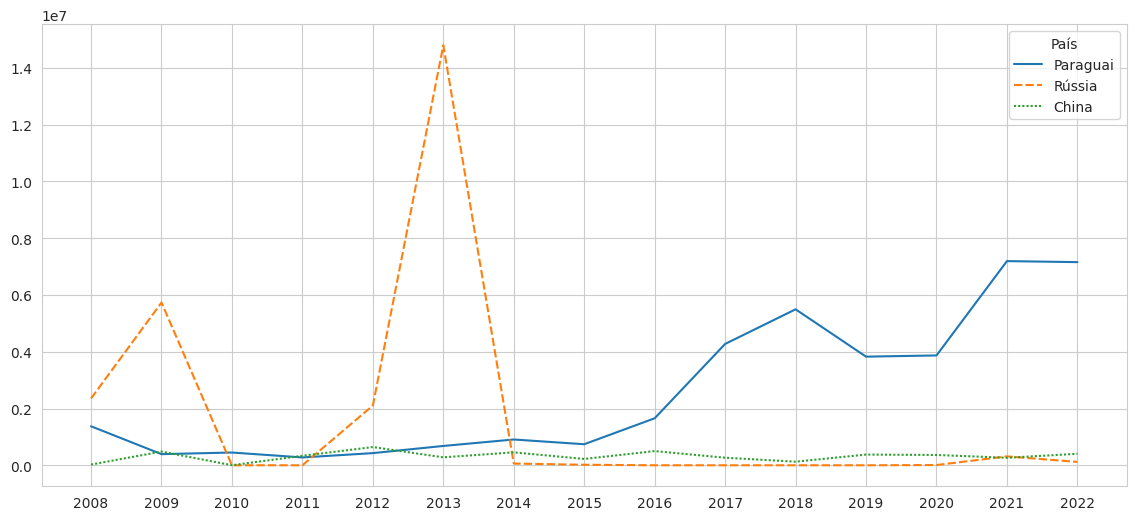

In [67]:
plt.figure(figsize=(14,6))
sns.lineplot(data=valor_uss_s[['Paraguai', 'Rússia', 'China']] )


## Criando um novo dataframe para outras métricas

In [17]:
display(valor_uss2.head(2))
display(quantidade_kg2.head(2))

,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
País,,,,,,,,,,,,,,,
Afeganistão,0,0,0,0,0,0,0,0,0,0,0,0,0,46,0
África do Sul,0,0,0,0,0,0,0,0,0,0,0,95,21,0,0


,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
País,,,,,,,,,,,,,,,
Afeganistão,0,0,0,0,0,0,0,0,0,0,0,0,0,11,0
África do Sul,0,0,0,0,0,0,0,0,0,0,0,26,4,0,0


In [18]:
valor_uss2 = valor_uss2.reset_index('País')
quantidade_kg2 = quantidade_kg2.reset_index('País')

display(valor_uss2.head(2))
display(quantidade_kg2.head(2))

,País,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Afeganistão,0,0,0,0,0,0,0,0,0,0,0,0,0,46,0
1,África do Sul,0,0,0,0,0,0,0,0,0,0,0,95,21,0,0


,País,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Afeganistão,0,0,0,0,0,0,0,0,0,0,0,0,0,11,0
1,África do Sul,0,0,0,0,0,0,0,0,0,0,0,26,4,0,0


In [19]:
# transformando as tabelas para formatar para o join

quantidade_kg2 = quantidade_kg2.melt(id_vars=['País'], value_vars=quantidade_kg2.columns[1:])
valor_uss2 = valor_uss2.melt(id_vars=['País'], value_vars=valor_uss2.columns[1:])

display(valor_uss2.head(2))
display(quantidade_kg2.head(2))

,País,variable,value
0,Afeganistão,2008,0
1,África do Sul,2008,0


,País,variable,value
0,Afeganistão,2008,0
1,África do Sul,2008,0


In [20]:
# renomeando as colunas para a correta identificação das variáveis

quantidade_kg2.columns = ['pais_destino', 'ano', 'quantidade_l']
valor_uss2.columns = ['pais_destino', 'ano', 'valor_uss']

display(quantidade_kg2.head(2))
display(valor_uss2.head(2))

,pais_destino,ano,quantidade_l
0,Afeganistão,2008,0
1,África do Sul,2008,0


,pais_destino,ano,valor_uss
0,Afeganistão,2008,0
1,África do Sul,2008,0


In [21]:
# fazendo o .join() entre as duas tabelas para tranasformá-la em uma só
exportacao = quantidade_kg2.join(valor_uss2['valor_uss'])
exportacao.head()

,pais_destino,ano,quantidade_l,valor_uss
0,Afeganistão,2008,0,0
1,África do Sul,2008,0,0
2,"Alemanha, República Democrática",2008,265742,429970
3,Angola,2008,25721,71083
4,Antígua e Barbuda,2008,0,0


In [22]:
exportacao.isna().sum()

pais_destino    0
ano             0
quantidade_l    0
valor_uss       0
dtype: int64

In [23]:
# alterando a coluna ano para o time datetime

exportacao['ano'] = pd.to_datetime(exportacao['ano'], format='%Y')
exportacao.dtypes

pais_destino            object
ano             datetime64[ns]
quantidade_l             int64
valor_uss                int64
dtype: object

## Explorando as exportações (data = exportacao) - primeiras informações e primeiros gráficos

In [24]:
# colocando a coluna 'ano' como index

exportacao1 = exportacao.set_index('ano')
exportacao1.tail()

,pais_destino,quantidade_l,valor_uss
ano,,,
2022-01-01,Tuvalu,0,0
2022-01-01,Uruguai,637117,997367
2022-01-01,Vanuatu,0,0
2022-01-01,Venezuela,23220,32351
2022-01-01,Vietnã,130,277


In [52]:
# analisando o somatorio de vendas doa 5 países que mais compraram do Brasil (foco no valor monetario) nos ultimos 15 anos

somatorio_venda_por_pais = exportacao.groupby(by='pais_destino').sum(['quantidade_l', 'valor_uss'])
somatorio_venda_por_pais = somatorio_venda_por_pais.sort_values(by='valor_uss', ascending=False)
somatorio_venda_por_pais_top5 = somatorio_venda_por_pais.loc[somatorio_venda_por_pais['valor_uss'] >= 4711464]


<Axes: xlabel='pais_destino'>

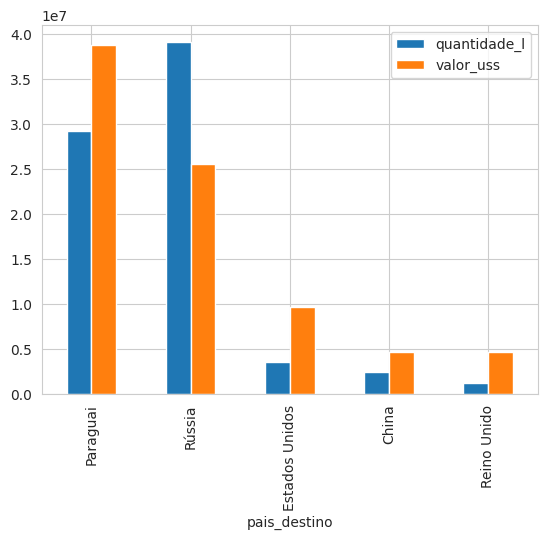

In [54]:
somatorio_venda_por_pais_top5.plot(kind='bar')

In [ ]:
# vou separar os paises que compraram do brasil dos paises que não compraram do brasil

paises_exportacao_zero = somatorio_venda_por_pais[somatorio_venda_por_pais['valor_uss'] == 0]
paises_exportacao_ativa = somatorio_venda_por_pais[somatorio_venda_por_pais['valor_uss'] != 0]

display(paises_exportacao_zero.head())
display(paises_exportacao_ativa.head())

In [ ]:
paises_exportacao_ativa.sum()

In [ ]:
paises_exportacao_ativa.head().plot(kind='bar')

### insights iniciais

nos últimos 15 anos, o montante do valor de exportação de vinho foi de U$$112,644,316 e a quantidade de vinho exportado de 87.982.432 litros

o país que mais comprou do brasil em termos monetarios foi o Paraguai e o país que comprou mais litros foi a Rússia

os países que não compram vinho do pais são:'Tanzânia', 'República Dominicana', 'Iraque', 'Costa do Marfim','Porto Rico', 'Ilhas Virgens', 'Senegal', 'Jamaica', 'Anguilla', 'Líbano', 'Tunísia'

# Organização, tratamento e exploração - dataset ProducaoVinho.csv

## Importando os dados

In [ ]:
producao = pd.read_csv('https://github.com/arianesannt/dados/raw/main/ProducaoVinho.csv', sep=';')
producao.head(2)

## Organizando os dados (formatação, limpeza, etc.)

In [ ]:
producao = producao.drop('id', axis=1)
producao.head(2)

In [ ]:
# a ideia foi colocar o rotulo do total nos produtos para diferenciar principalmente vinho de mesa e vinho fino de mesa

for i in producao.index:
  if i < 4:
    producao.at[i, 'produto'] = 'vinho de mesa - ' + producao.at[i, 'produto']
  elif 8 > i >= 4:
    producao.at[i, 'produto'] = 'vinho fino de mesa - ' + producao.at[i, 'produto']
  elif 14 > i >= 8:
    producao.at[i, 'produto'] = 'suco - ' + producao.at[i, 'produto']
  else:
    producao.at[i, 'produto'] = 'derivados - ' + producao.at[i, 'produto']


In [ ]:
# retirando as colunas de total
producao = producao.drop([0, 4, 8, 14])
producao

In [ ]:
# deixando informações dos últimos 15 anos apenas

colunas = producao.columns[-15:]
colunas = colunas.insert(0, 'produto')
producao = producao[colunas]

## criando um dataframe para série temporal

In [ ]:
# colocando a coluna produto como index
producao_s = producao.set_index('produto')


In [ ]:
# criando um dataframe pra série temporal
producao_s = producao_s.T
producao_s.head(2)


## criando um dataframe pra outras métricas

In [ ]:
producao1 = producao.melt('produto', producao.columns[1:])
producao1.columns = ['produto', 'ano', 'quantidade_l']
producao1.head(2)